In [2]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [3]:
# Read in the cleaned Spotify Dataset
spotify_data = pd.read_csv('cleaned_spotify_data.csv')
spotify_data

,Title,Artist,Genre,Year,Bpm,Energy,Danceability,dB,Liveness,Valence,Duration (in seconds),Acousticness,Speechiness,Spotify Rating
0,#thatPOWER,will.i.am,Pop,2013,128,61,80,-6,7,40,280,0,6,68
1,(When You Gonna) Give It Up to Me (feat. Keysh...,Sean Paul,Pop,2006,96,76,71,-3,4,72,244,7,23,68
2,...Baby One More Time,Britney Spears,Pop,1999,93,70,76,-6,44,91,211,20,3,81
3,★,David Bowie,Rock/Metal,2016,98,53,36,-9,18,12,598,21,3,50
4,03' Bonnie & Clyde,JAY-Z,Hip hop/Rap/R&b,2002,90,68,76,-5,15,33,206,23,31,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,You're Beautiful,James Blunt,Other,2005,82,48,68,-10,9,45,209,63,3,77
2381,Youth of the Nation,P.O.D.,Rock/Metal,2001,98,86,56,-8,39,52,256,1,6,72
2382,You've Got The Love,Florence + The Machine,Pop,2009,110,69,57,-5,10,40,169,0,3,77
2383,Yummy,Justin Bieber,Pop,2020,146,51,68,-7,12,50,209,35,10,70


## Duplicate tracks/Track retention in playlist over the year?

In [4]:
# find number of unique songs over the years
spotify_data['Title'].nunique()

2261

In [5]:
# Get list of duplicate rows based on 'Title' column
more_than_once = spotify_data[spotify_data.duplicated('Title')]
more_than_once

,Title,Artist,Genre,Year,Bpm,Energy,Danceability,dB,Liveness,Valence,Duration (in seconds),Acousticness,Speechiness,Spotify Rating
107,Angel,Shaggy,Pop,2000,171,77,74,-3,4,81,235,12,18,78
110,Animal,Neon Trees,Rock/Metal,2010,148,83,48,-6,38,74,212,0,4,66
122,Apologize,Timbaland,Pop,2007,118,60,65,-6,10,10,184,3,3,74
136,Ayo Technology,Milow,Pop,2009,128,66,78,-8,10,75,214,65,3,58
141,Baby,Justin Bieber,Pop,2010,65,86,73,-5,11,54,214,4,14,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,When I'm Gone,Eminem,Hip hop/Rap/R&b,2005,75,75,62,-5,27,75,281,6,35,71
2296,Whistle,Hoodie Forester,Other,2020,95,75,62,-5,57,49,125,6,4,47
2304,Who Says,Selena Gomez & The Scene,Pop,2014,101,92,68,-3,15,73,195,6,5,54
2323,Without Me,Halsey,Other,2018,136,49,75,-7,9,53,202,30,7,77


## Who has the most songs on the charts?

In [6]:
# Any of the artists have more than one song that stayed on the list for more than one year?
more_than_once["Artist"].nunique()

100

In [7]:
# Number of times an artist shows up on the charts
number_of_times = more_than_once.pivot_table(index = ['Artist'], aggfunc ='size')
number_of_times

Artist
Alessia Cara         1
Alesso               1
Amy Winehouse        1
Avicii               1
Avril Lavigne        1
                    ..
Waka Flocka Flame    1
Yeah Yeah Yeahs      1
Years & Years        1
ZHU                  1
Zedd                 1
Length: 100, dtype: int64

In [8]:
# Rearrange in descending order to show who has the most songs on t`he charts
more_than_once_descending = number_of_times.sort_values(ascending=False)
more_than_once_descending

Artist
Rihanna          5
Justin Bieber    4
Ed Sheeran       3
OneRepublic      3
Taio Cruz        3
                ..
Robin Thicke     1
Robyn            1
Sam Feldt        1
Sammie           1
Alessia Cara     1
Length: 100, dtype: int64

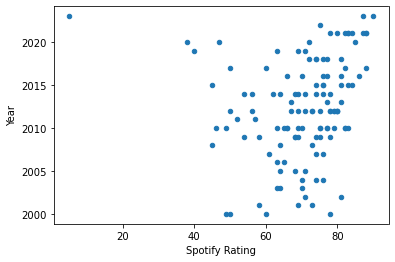

In [28]:
more_than_once.plot.scatter(x='Spotify Rating',
                      y='Year')

### Plots for the dashboard: Year vs Spotify Rating; Bar chart for Top 15 Artists vs Number of Times an Artist is on the chart.

#### Top 15 Artists that Have More than One Song that Stayed on the Charts More than One Year

In [12]:
# Top 15 Artists who appeared most on the charts
# top_20 = (more_than_once_descending.value_counts()).iloc[:10]
# top_20.plot(kind="bar")
top_15 = more_than_once_descending.nlargest(n=15)
top_15

Artist
Rihanna                     5
Justin Bieber               4
Ed Sheeran                  3
OneRepublic                 3
Taio Cruz                   3
Taylor Swift                3
Selena Gomez & The Scene    2
Jonas Blue                  2
One Direction               2
Flo Rida                    2
Eminem                      2
Swedish House Mafia         2
The Chainsmokers            2
Maroon 5                    2
Trey Songz                  2
dtype: int64

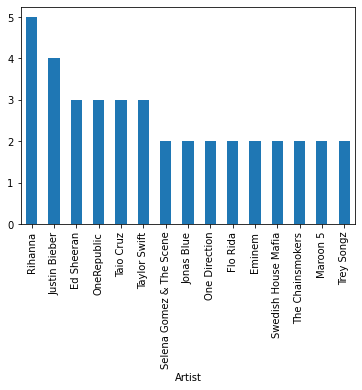

In [13]:
#plot top 15 artists who have multiple songs that stayed on the charts more than one year
top_15.plot.bar()

#### Artists that Have Appeared on the Charts the Most

In [16]:
# Getting the number of times an artist has appeared on the charts
all_number_of_times = spotify_data.pivot_table(index = ['Artist'], aggfunc ='size')
all_number_of_times_descending = all_number_of_times.sort_values(ascending=False)
all_number_of_times_descending

Artist
Rihanna          30
Drake            28
Taylor Swift     23
Eminem           22
Calvin Harris    22
                 ..
Lunay             1
Lumidee           1
Lukx              1
Lukas Graham      1
"H ""two"" O"     1
Length: 1014, dtype: int64

In [26]:
# Getting the top 40 artists that has appeared the most on the charts (10 times or more)
top40_all_time = all_number_of_times_descending.nlargest(n=40)
top40_all_time

Artist
Rihanna              30
Drake                28
Taylor Swift         23
Eminem               22
Calvin Harris        22
Ariana Grande        20
David Guetta         19
Ed Sheeran           19
Kanye West           19
Justin Bieber        18
Beyoncé              18
Usher                17
Coldplay             17
Chris Brown          17
Maroon 5             17
Black Eyed Peas      17
Britney Spears       15
Jason Derulo         14
Katy Perry           14
Bruno Mars           14
The Weeknd           14
Bad Bunny            13
Justin Timberlake    13
Flo Rida             12
JAY-Z                12
P!nk                 12
Nelly                12
Post Malone          12
Adele                11
Alicia Keys          11
Selena Gomez         10
Enrique Iglesias     10
Jennifer Lopez       10
OneRepublic          10
Ludacris             10
One Direction        10
Miley Cyrus          10
Pitbull              10
Lady Gaga            10
Dua Lipa             10
dtype: int64

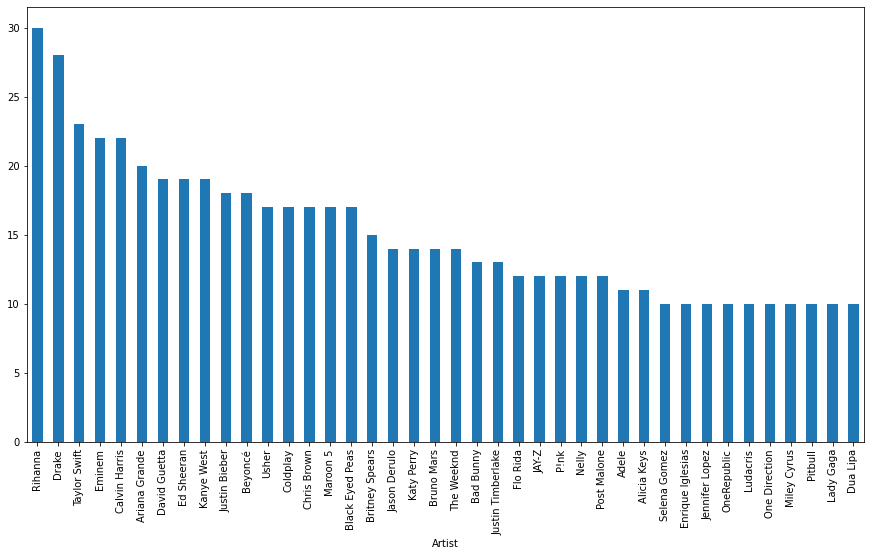

In [27]:
top40_all_time.plot.bar(figsize = (15, 8))

In [ ]:
# Thoughts/Draft

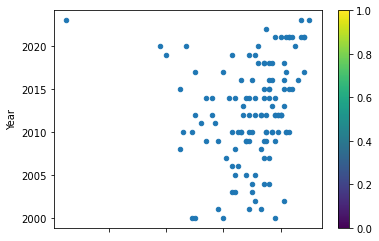

In [27]:
more_than_once.plot.scatter(x='Spotify Rating',
                      y='Year',
                      colormap='viridis')

In [28]:
# To find all the artists who has more than one song that stayed on the charts for more than one year
v = more_than_once.Artist.value_counts()
more_than_once[more_than_once.Artist.isin(v.index[v.gt(1)])]

,Title,Artist,Genre,Year,Bpm,Energy,Danceability,dB,Liveness,Valence,Duration (in seconds),Acousticness,Speechiness,Spotify Rating
141,Baby,Justin Bieber,Pop,2010,65,86,73,-5,11,54,214,4,14,83
279,Boyfriend,Justin Bieber,Pop,2012,97,55,72,-6,13,33,171,4,5,75
385,Closer,The Chainsmokers,Other,2016,95,52,75,-6,11,66,245,41,3,86
420,Counting Stars,OneRepublic,Rock/Metal,2014,122,71,66,-5,12,48,257,7,4,64
421,Counting Stars,OneRepublic,Rock/Metal,2014,122,71,66,-5,12,48,258,7,4,78
463,Daylight,Maroon 5,Pop,2012,120,67,66,-5,26,37,225,0,3,71
479,Diamonds,Rihanna,Pop,2012,92,71,56,-5,11,39,225,0,5,78
535,Don't,Ed Sheeran,Pop,2014,95,61,81,-7,64,85,220,1,7,74
557,Dynamite,Taio Cruz,Pop,2010,120,78,75,-4,4,82,203,0,9,82
613,Fast Car,Jonas Blue,Pop,2018,114,58,67,-7,31,55,212,47,6,76
